[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/joshmaglione/CS102-Jupyter/main?labpath=.%2FWeek11.ipynb) 

<a href="https://colab.research.google.com/github/joshmaglione/CS102-Jupyter/blob/main/Week11.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

[View on GitHub](https://github.com/joshmaglione/CS102-Jupyter/blob/main/Week11.ipynb)

# Week 11: Unsupervised learning

![](https://miro.medium.com/v2/resize:fit:587/1*J82yf-YU7Ryhh5BdhyOdcw.png)

**What is the difference between supervised and unsupervised learning?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Unsupervised learning can highlight intrinsic information about the data.

One example is **dimension reduction**:
- take high-dimensional data and return lower-dimensional data that still retains most of the information (usually info = total variance)
- used for:
  - visualization (from 10 dimensions to 2)
  - speed up model training (from 2000 dimensions to 400)

## Principal component analysis

Principal component analysis (PCA) is perhaps one of the most broadly used unsupervised algorithms. 

(My personal favorite)

PCA is fundamentally a **dimensionality reduction** algorithm, but it can be used for (among other things)
- visualization
- noise filtering
- feature extraction

The mathematics around PCA is super fun. 

In [Geometric Foundations for Data Analysis](https://joshmaglione.com/2023CS4102.html) we go through PCA in detail. 

### Toy example

We compute the two principal components, which are just vectors.

We'll plot both principal components on the plot of the data.

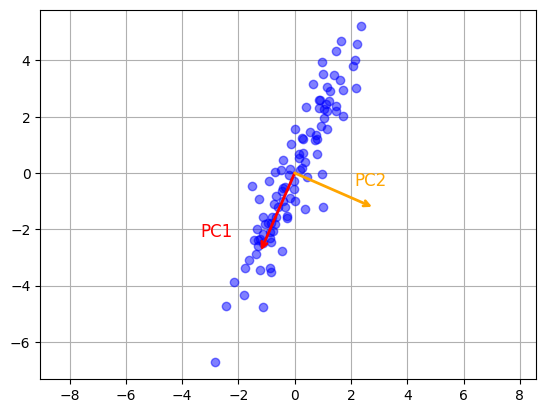

In [2]:
# Load the data
df = pd.read_csv("data/pcadata.csv")

# Helper function
def draw_vector(v0, v1, color='red'):
    ax = plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color=color)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Perform PCA
model = PCA(n_components=2)
model.fit(df)

# Plot the principal components
plt.grid()
plt.axis('equal')
plt.scatter(df.x, df.y, c='blue', alpha=0.5, zorder=2)
mu = model.mean_
PC1, PC2 = model.components_
var1, var2 = model.explained_variance_
draw_vector(mu, mu + 3*PC1, color='red')
draw_vector(mu, mu + 3*PC2, color='orange')
plt.text(mu[0] + 3*PC1[0] - 1, mu[1] + 3*PC1[1] + 0.5, 'PC1', color='red', fontsize=12, ha='right')
plt.text(mu[0] + 3*PC2[0] + 0.5, mu[1] + 3*PC2[1] + 0.75, 'PC2', color='orange', fontsize=12, ha='right')
plt.show()

In [3]:
model = PCA(n_components=2)						# Bringing it here to see
model.fit(df)
print(f"First component: PC1 = {model.components_[0]}")
print(f"Second component: PC2 = {model.components_[1]}")

First component: PC1 = [-0.40037618 -0.91635087]
Second component: PC2 = [ 0.91635087 -0.40037618]


To each principal component is a value -- eigenvalue eigenvector pairs -- this measures variance.

The first principal component is where the largest variance occurs. 

It is decreasing (in order) for the rest of the principal components.

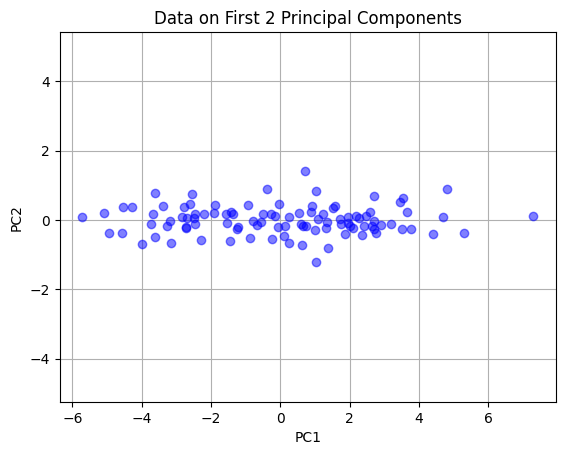

In [4]:
# Project the data onto the first 2 principal components
projected_data = model.transform(df)

# Create a scatter plot of the projected data
plt.scatter(projected_data[:, 0], projected_data[:, 1], c='blue', alpha=0.5, zorder=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data on First 2 Principal Components')
plt.grid()
plt.axis('equal')
plt.show()

Notice that PC1 is not just one variable $x$ or $y$. It is a *linear combination* of the two.

This can make it challenging to interpret the components, but for many scenarios this is OK.

We can get the vector of the explained variance. 

In [5]:
model.explained_variance_ratio_

array([0.97648448, 0.02351552])

This tells us :
- $97.6\%$ of the variance is seen in PC1
- $2.4\%$ of the variance (the rest) is seen in PC2.

So really, we could just keep one dimension.

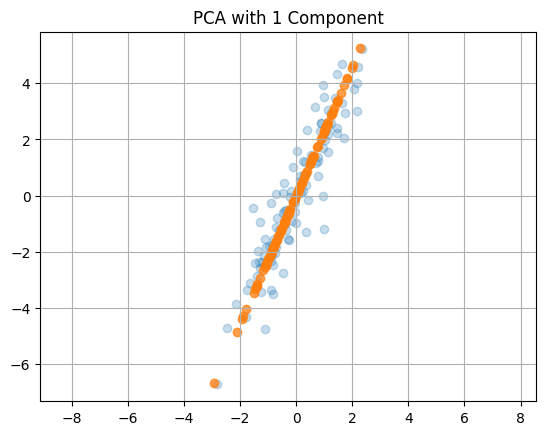

In [6]:
pca = PCA(n_components=1)	# Only use 1 component
X = df.to_numpy()
pca.fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)
plt.grid()
plt.axis('equal')
plt.scatter(X[:, 0], X[:, 1], alpha=0.25)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.75)
plt.title('PCA with 1 Component')
plt.show()

The light blue points are the original data, while the orange points are the projected version. 

The key to PCA:
- information along the least important principal axes are removed!
- Th reduced dataset is, in some sense, good enough to encode the most important relationships between the points.

This is a toy example, so it's not easy to see the benefit, but it is easy to see the impact.

## Back to Iris

Let's load up the Iris data set again and plot the basic data.

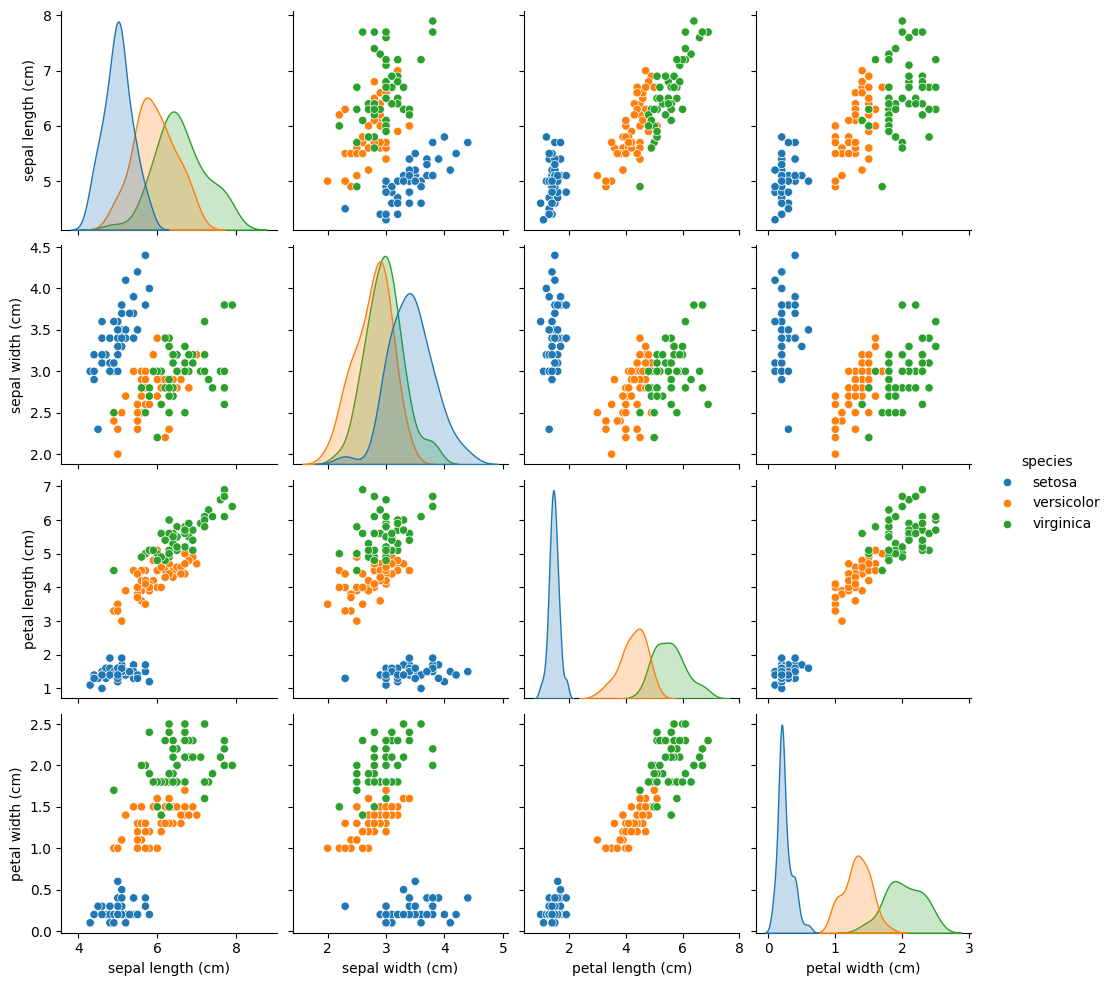

In [7]:
from sklearn.datasets import load_iris
import seaborn as sns

iris = load_iris()
ser = pd.Series(iris.target_names[iris.target], name='species')
df_labeled = pd.DataFrame(
	iris.data, 
	columns=iris.feature_names, 
)
df_labeled = pd.concat([ser, df_labeled], axis=1)

_ = sns.pairplot(
	df_labeled, 
	hue='species'
)	

(This is just an excuse to enjoy a nice image 🫠)

Let's also recall that we can get quick information with `describe`.

In [12]:
df_labeled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df_labeled.head()

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


Notice that the scale of petal width is much smaller than the other features. 

This is a problem for PCA, *which is sensitive to the scale of the features*. 

We can fix this by standardizing the data.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_labeled.drop('species', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df_labeled.columns[1:])
df_scaled = pd.concat([df_labeled['species'], df_scaled], axis=1)
df_scaled.head()

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,-0.900681,1.019004,-1.340227,-1.315444
1,setosa,-1.143017,-0.131979,-1.340227,-1.315444
2,setosa,-1.385353,0.328414,-1.397064,-1.315444
3,setosa,-1.506521,0.098217,-1.283389,-1.315444
4,setosa,-1.021849,1.249201,-1.340227,-1.315444


Umm what?!

![](https://media.giphy.com/media/dAVLtOPb0JeIE/giphy.gif?cid=ecf05e476jqe1aysalqrm12p61ybtfb2bo4aeg27gpsrxng4&ep=v1_gifs_search&rid=giphy.gif&ct=g)

It's alright Troy, let's plot.

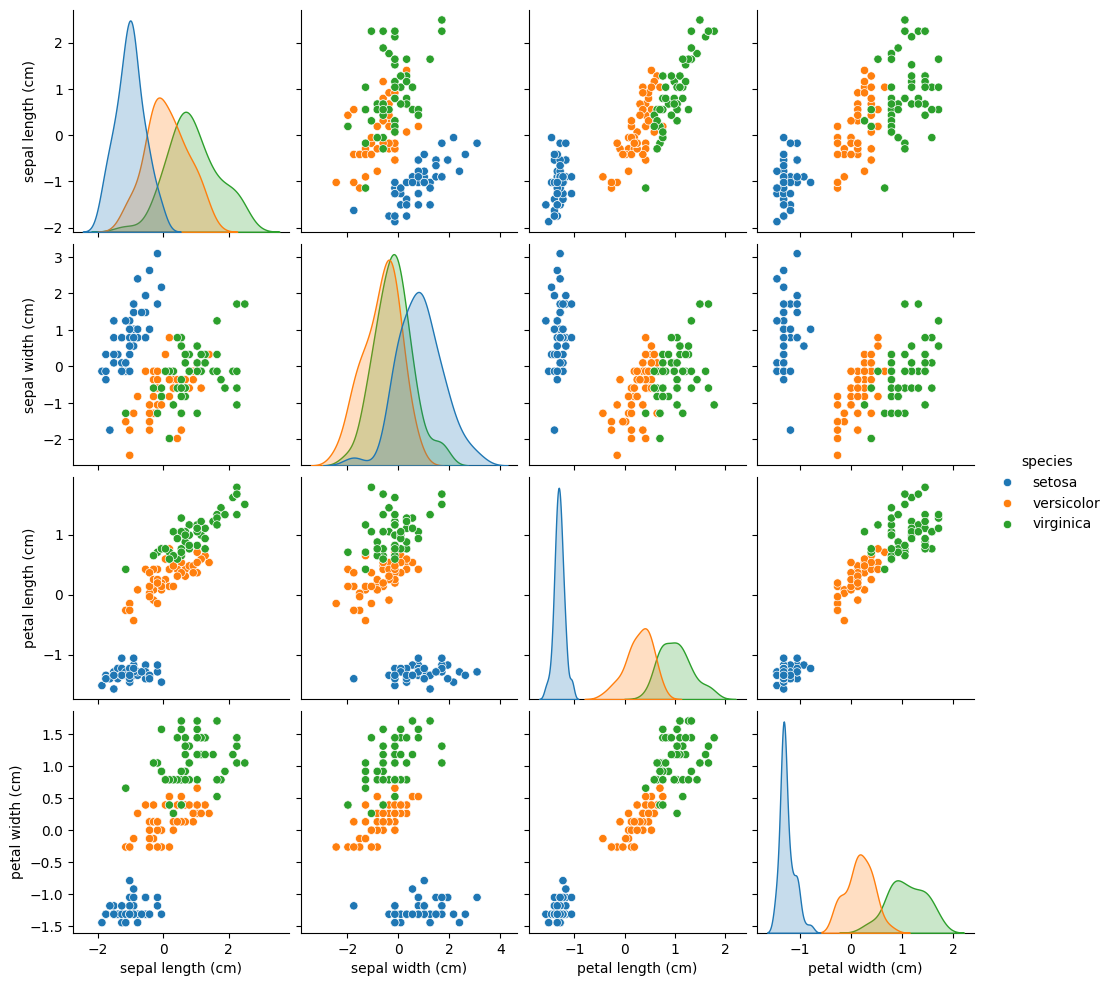

In [10]:
_ = sns.pairplot(
	df_scaled, 
	hue='species'
)	

In [11]:
df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


The transformation is not a pure translation, but it does keep most of the "geometry" in tact. 

OK, let's actually do the PCA now.

In [24]:
pca = PCA()
X = df_scaled.drop('species', axis=1)
X_new = pca.fit_transform(X)
X_new=pd.DataFrame(X_new, columns = [f"Feature {i}" for i in range(1,5)])
X_new.head()

,Feature 1,Feature 2,Feature 3,Feature 4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


In [30]:
print("The explained variance of all 4 components:")
for i, r in enumerate(pca.explained_variance_ratio_):
	print(f"PC{i+1}: {r*100:.2f}%")

The explained variance of all 4 components:
PC1: 72.96%
PC2: 22.85%
PC3: 3.67%
PC4: 0.52%


We would get over $95\%$ of the total variance in the first two components.

<Axes: >

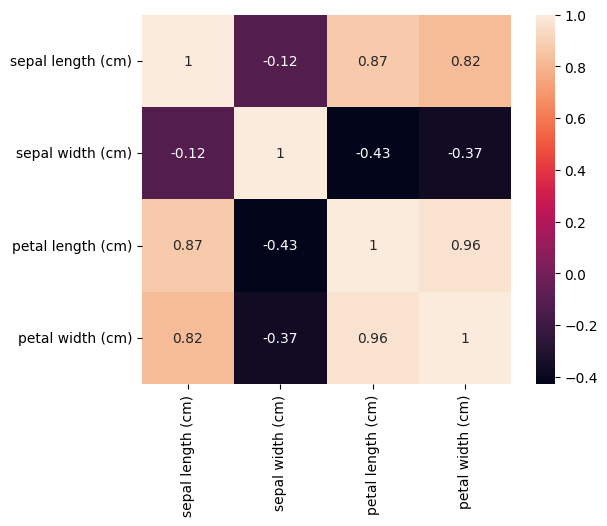

In [31]:
sns.heatmap(X.corr(), annot = True, square = True)

<Axes: >

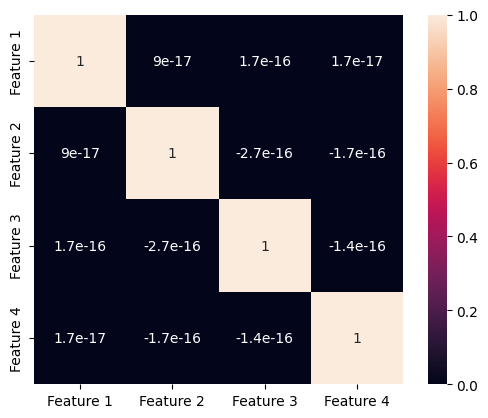

In [32]:
sns.heatmap(X_new.corr(), annot = True, square = True)

This is *the key feature* of PCA:
- the principal components are uncorrelated (linearly independent!).

So what are the principal components in this example?

In [35]:
print("Principal components:")
for i, row in enumerate(pca.components_):
	print(f"PC{i+1}: {row}")

Principal components:
PC1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
PC2: [0.37741762 0.92329566 0.02449161 0.06694199]
PC3: [-0.71956635  0.24438178  0.14212637  0.63427274]
PC4: [-0.26128628  0.12350962  0.80144925 -0.52359713]


We might interpret "Feature 1" as approximately:
$$
	\frac{1}{2}x_{\text{s. len.}} - \frac{1}{4} x_{\text{s. wid.}} + \frac{1}{2} x_{\text{p. len.}} + \frac{1}{2} x_{\text{p. wid.}}
$$

Since the first two features have nearly all of the variances, let's project onto these two dimensions.

We'll plot the data.

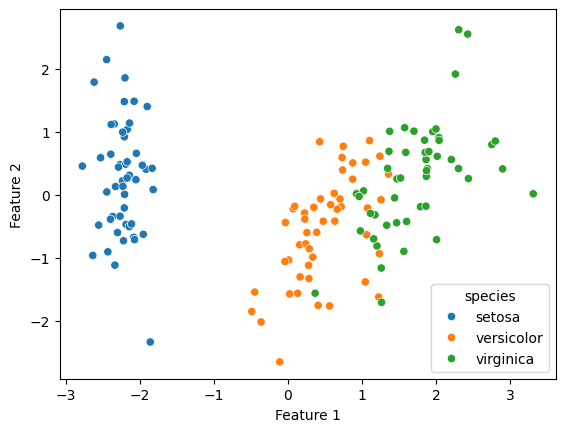

In [41]:
_ = sns.scatterplot(
	x=X_new['Feature 1'], 
	y=X_new['Feature 2'], 
	hue=df_scaled['species']
)

We could just include all 4 dimensions. Four is tiny, but two is nice to visualize.

Notice that PCA has not used the labels *and* you can see clusters of species.

## Clustering algorithms

Clustering algorithms group subsets of data based on features.

The notion of a "cluster" is tricky to define canonically. 

In one context clusters might be determined by
- distance from a centroid
- distance from nearest neighbor

There are many kinds of clustering algorithms. 

We will look at $k$-means clustering.

The idea behind $k$-means clustering:
- Specify $k$ the number of desired clusters
- It will find $k$ subsets of the data based on minimal distance to centroids.

If our data were in $\mathbb{R}^2$ and we wanted $k=9$ clusters, data gets partitioned based on the following *tesselation*.

![](imgs/Voronoi_growth_euclidean.gif)

Any data point in the blue region, for example, would be in the blue cluster. 

## Exercises

1. Run through the Iris example with:
	- no scaler
	- the `MinMaxScaler`

   what differences do you see? How do the correlation matrices differ? You can build a correlation matrix with the `corr` method: e.g. `df.corr()`.